In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [194]:
sales_train = pd.read_csv('Data/train.csv')
sales_test = pd.read_csv('Data/test.csv')

In [195]:
sales_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [196]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [197]:
#checking if dataframe contains null value
sales_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [198]:
#item weight and outlet_size size feature contains missing values
sales_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [199]:
sales_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [200]:
#filling missing value of Item_Weight column with its mean value in both train and test dataset

sales_train['Item_Weight'].fillna(value=sales_train['Item_Weight'].mean(),inplace=True)
sales_test['Item_Weight'].fillna(value=sales_test['Item_Weight'].mean(),inplace=True)

In [201]:
sales_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [202]:
#now exploring Outlet_Size
sales_train['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [203]:
#since Outlet_Size is categorical data so filling its null value with mode(highest number of value: medium)
sales_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [204]:
sales_train['Outlet_Size'].mode()

0    Medium
dtype: object

In [205]:
sales_train['Outlet_Size'].fillna(value=sales_train['Outlet_Size'].mode()[0],inplace=True)
sales_test['Outlet_Size'].fillna(value=sales_train['Outlet_Size'].mode()[0],inplace=True)

In [206]:
sales_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [207]:
sales_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [208]:
sales_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [209]:
#droping unnecessary features
sales_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
sales_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [210]:
sales_train.head(200)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300000,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920000,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500000,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930000,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
195,10.500000,Low Fat,0.041395,Fruits and Vegetables,37.6164,1997,Small,Tier 1,Supermarket Type1,540.6296
196,19.000000,Regular,0.097313,Frozen Foods,48.0718,1997,Small,Tier 1,Supermarket Type1,992.7078
197,14.600000,Low Fat,0.059583,Others,238.8538,1999,Medium,Tier 1,Supermarket Type1,6008.8450
198,12.857645,Regular,0.098664,Dairy,62.9194,1985,Medium,Tier 3,Supermarket Type3,2105.2596


In [211]:
sales_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [212]:
sales_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

EDA

In [213]:
sales_train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


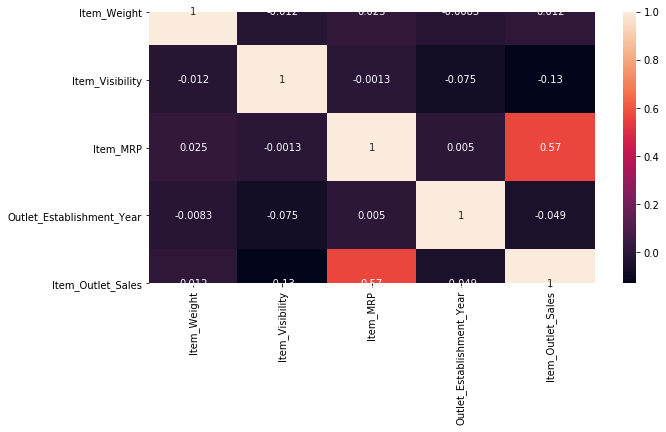

In [214]:
plt.figure(figsize=(10,5))
sns.heatmap(sales_train.corr(),annot=True)
plt.show()

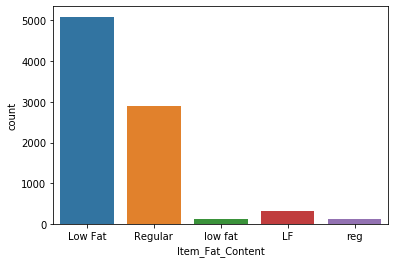

In [215]:
sns.countplot('Item_Fat_Content',data= sales_train)

Data Preprocessing

In [265]:
#converting categorical data into numerical data using label encoding
from sklearn.preprocessing import LabelEncoder

In [266]:
le = LabelEncoder()

In [267]:
sales_train['Item_Fat_Content_u'] = le.fit_transform(sales_train['Item_Fat_Content'])
sales_train['Item_Type_u'] = le.fit_transform(sales_train['Item_Type'])
sales_train['Outlet_Size_u'] = le.fit_transform(sales_train['Outlet_Size'])
sales_train['Outlet_Location_Type_u'] = le.fit_transform(sales_train['Outlet_Location_Type'])
sales_train['Outlet_Type_u'] = le.fit_transform(sales_train['Outlet_Type'])

#or sales_train = sales_train.apply(le.fit_transform) if all features are categorical data

In [287]:
sales_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_u,Item_Type_u,Outlet_Size_u,Outlet_Location_Type_u,Outlet_Type_u
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0,4,1,0,1
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,1,14,1,2,2
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0,10,1,0,1
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800,1,6,1,2,0
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,0,9,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834,0,13,0,2,1
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850,1,0,1,1,1
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136,0,8,2,1,1
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976,1,13,1,2,2


In [270]:
sales_train['Item_Fat_Content'] = sales_train['Item_Fat_Content'].replace(['LF','low fat'],'Low Fat')

In [271]:
sales_train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [272]:
sales_train['Item_Fat_Content'] = sales_train['Item_Fat_Content'].replace('reg','Regular')

In [273]:
sales_train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [274]:
sales_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [275]:
sales_train['Item_Fat_Content_u'].unique()

array([0, 1], dtype=int64)

In [276]:
sales_train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [277]:
sales_train['Item_Type_u'].unique()

array([ 4, 14, 10,  6,  9,  0, 13,  5,  2,  8,  7,  3,  1, 15, 11, 12],
      dtype=int64)

In [288]:
sales_train['Outlet_Size'].unique()
#to known the label encoded value for outlet_size, we need to sort its unique values
#and encoded value starts from 0.

array(['Medium', 'High', 'Small'], dtype=object)

In [292]:
sorted(sales_train['Outlet_Size'].unique())

['High', 'Medium', 'Small']

In [289]:
sales_train['Outlet_Size_u'].unique()

array([1, 0, 2], dtype=int64)

In [293]:
sales_train['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [294]:
sorted(sales_train['Outlet_Location_Type'].unique())

['Tier 1', 'Tier 2', 'Tier 3']

In [295]:
sales_train['Outlet_Location_Type_u'].unique()

array([0, 2, 1], dtype=int64)

In [296]:
sorted(sales_train['Outlet_Type'].unique())

['Grocery Store',
 'Supermarket Type1',
 'Supermarket Type2',
 'Supermarket Type3']

In [297]:
sales_train.drop(['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'],axis=1,inplace=True)

In [298]:
from sklearn.model_selection import train_test_split


In [299]:
X = sales_train.drop('Item_Outlet_Sales',axis=1)
y = sales_train['Item_Outlet_Sales']

In [300]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [301]:
X_train

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_u,Item_Type_u,Outlet_Size_u,Outlet_Location_Type_u,Outlet_Type_u
2743,4.785000,0.092576,121.0098,2004,0,1,2,1,1
2095,10.895000,0.009614,122.9730,1987,1,4,0,2,1
777,5.460000,0.032171,184.8240,2004,1,3,2,1,1
8435,12.857645,0.000000,196.5084,1985,0,0,1,2,3
7193,10.000000,0.073679,120.9440,2009,0,8,1,2,2
...,...,...,...,...,...,...,...,...,...
3536,8.880000,0.098622,208.4270,1997,0,9,2,0,1
4990,18.600000,0.015859,152.9366,2007,0,13,1,1,1
2463,18.750000,0.034361,215.7218,1999,0,9,1,0,1
6938,14.500000,0.000000,159.3262,2004,1,13,2,1,1


In [302]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6818 entries, 2743 to 7056
Data columns (total 9 columns):
Item_Weight                  6818 non-null float64
Item_Visibility              6818 non-null float64
Item_MRP                     6818 non-null float64
Outlet_Establishment_Year    6818 non-null int64
Item_Fat_Content_u           6818 non-null int32
Item_Type_u                  6818 non-null int32
Outlet_Size_u                6818 non-null int32
Outlet_Location_Type_u       6818 non-null int32
Outlet_Type_u                6818 non-null int32
dtypes: float64(3), int32(5), int64(1)
memory usage: 399.5 KB


In [303]:
from sklearn.preprocessing import StandardScaler

In [304]:
ss = StandardScaler()

In [305]:
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [306]:
X_train_ss

array([[-1.91193362,  0.52319991, -0.33136059, ...,  1.38325597,
        -0.14219562, -0.25703116],
       [-0.47262412, -1.08870296, -0.29981689, ..., -1.9463254 ,
         1.08656199, -0.25703116],
       [-1.75292643, -0.6504262 ,  0.6939736 , ...,  1.38325597,
        -0.14219562, -0.25703116],
       ...,
       [ 1.37774841, -0.60788823,  1.19042378, ..., -0.28153471,
        -1.37095324, -0.25703116],
       [ 0.37659205, -1.27549384,  0.28428789, ...,  1.38325597,
        -0.14219562, -0.25703116],
       [ 1.78998927,  0.91298892,  0.86627818, ..., -0.28153471,
        -0.14219562, -0.25703116]])

In [307]:
X_test_ss.shape

(1705, 9)

In [308]:
y_test.shape

(1705,)

In [309]:
joblib.dump(ss,'models/scaler.sav')

['models/scaler.sav']

Model Building

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
le = LinearRegression()

In [85]:
le.fit(X_train_ss,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
prediction_le = le.predict(X_test_ss)

In [87]:
prediction_le

array([2000.62773592, 3419.10902266, 1852.66045724, ...,  469.51297224,
       3105.39625955, 1261.66450652])

In [88]:
y_test

6104    1510.0344
656      938.7780
2410    1486.0656
2301    1864.2400
2051    4364.9848
          ...    
4995    4870.3270
3746    1569.9564
5522     703.0848
1041    3542.0560
117     2542.0244
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

In [89]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [93]:
print(r2_score(y_test,prediction_le))
print(mean_absolute_error(y_test,prediction_le))
print(mean_squared_error(y_test,prediction_le)**0.5)

0.5126541178459847
905.3361780310169
1207.4379156860946


In [101]:
#Random forest classifier
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

In [95]:
rf.fit(X_train,y_train)

c:\users\gaurav\anaconda3\envs\deeplnenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [97]:
prediction_rf = rf.predict(X_test)

In [98]:
print(r2_score(y_test,prediction_rf))
print(mean_absolute_error(y_test,prediction_rf))
print(mean_squared_error(y_test,prediction_rf)**0.5)

0.5134829324419138
842.1506217243402
1206.4107519712336


Hyper Parameter Tuning

In [99]:
from sklearn.model_selection import GridSearchCV

In [104]:
param_grid = {'n_estimators':[10,100,1000],'max_depth':range(1,6),'min_samples_split':np.linspace(0.1,0.6,5)}

In [105]:
grid = GridSearchCV(estimator=rf,param_grid=param_grid,verbose=3)

In [106]:
grid.fit(X_train,y_train)

c:\users\gaurav\anaconda3\envs\deeplnenv\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 75 candidates, totalling 225 fits
[CV] max_depth=1, min_samples_split=0.1, n_estimators=10 .............
[CV]  max_depth=1, min_samples_split=0.1, n_estimators=10, score=0.245, total=   0.0s
[CV] max_depth=1, min_samples_split=0.1, n_estimators=10 .............
[CV]  max_depth=1, min_samples_split=0.1, n_estimators=10, score=0.254, total=   0.0s
[CV] max_depth=1, min_samples_split=0.1, n_estimators=10 .............
[CV]  max_depth=1, min_samples_split=0.1, n_estimators=10, score=0.260, total=   0.0s
[CV] max_depth=1, min_samples_split=0.1, n_estimators=100 ............
[CV]  max_depth=1, min_samples_split=0.1, n_estimators=100, score=0.244, total=   0.2s
[CV] max_depth=1, min_samples_split=0.1, n_estimators=100 ............
[CV]  max_depth=1, min_samples_split=0.1, n_estimators=100, score=0.256, total=   0.2s
[CV] max_depth=1, min_samples_split=0.1, n_estimators=100 ............
[CV]  max_depth=1, min_samples_split=0.1, n_estimators=100, score=0.263, total= 

[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:  3.3min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(1, 6),


In [107]:
grid.best_params_

{'max_depth': 5, 'min_samples_split': 0.1, 'n_estimators': 10}

In [108]:
grid.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=0.1,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [109]:
grid.best_score_

0.5895721900770649

In [110]:
grid_predict = grid.predict(X_test)

In [111]:
print(r2_score(y_test,grid_predict))
print(mean_absolute_error(y_test,grid_predict))
print(mean_squared_error(y_test,grid_predict)**0.5)

0.5830775452938247
790.5612647957961
1116.7958770704736


final randomforest model with best parameter

In [112]:
model = RandomForestRegressor(max_depth= 5,min_samples_split= 0.1,n_estimators= 10)

In [113]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=0.1,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [114]:
final_predict = model.predict(X_test)

In [115]:
print(f"r2score is : {r2_score(y_test,final_predict)}")

r2score is : 0.5815792029104991


In [116]:
import joblib

In [117]:
joblib.dump(model,'models/model.sav')

['models/model.sav']

In [119]:
joblib.dump(le,'models/lr_model.sav')

['models/lr_model.sav']

In [312]:
joblib.dump(ss,'scaler.pkl')

['scaler.pkl']

In [313]:
joblib.dump(model,'rf_model.sav')

['rf_model.sav']